In [1]:
#select
#scm.*, czp.czp_id, czp.czp_op_id, czp.CZP_START_DATE, 
#czp.CZP_EXPIRY_DATE, czp.CZP_PERCENTAGE, czp.CZP_PRICE, 
#czp.CZP_DURATION, czp.CZP_ZTQ_ID, k.K_REGISTER, osp.*
#from zoocube.ddstf_scm_sales_contrib_margin scm
#join ZOOMAN.KUNDEN k
#on scm.CUS_N_KEY_CUSTOMER = k.K_ID 
#and k.K_REGISTER = 1
#join ZOOMAN.ORDER_SALES_PROFILE osp
#on osp.OSP_O_ID = scm.SCM_N_ORDER_NR
#left outer join ZOOMAN.CUSTOMERS_ZOOPRIME_PLANS czp
#on scm.CUS_N_KEY_CUSTOMER = czp.CZP_K_ID 
#and czp.CZP_EXPIRY_DATE >= to_date((to_char(TDT_T_KEY_ORDER_DATE, 'dd/mm/yyyy') ||' '|| THR_C_KEY_ORDER_HOUR), 'dd/mm/yyyy HH24:MI')
#and czp.CZP_START_DATE <= to_date((to_char(TDT_T_KEY_ORDER_DATE, 'dd/mm/yyyy') ||' '|| THR_C_KEY_ORDER_HOUR), 'dd/mm/yyyy HH24:MI')
#where SIT_N_KEY_SITE = 8
#and TDT_T_KEY_ORDER_DATE >= to_date('01/01/18', 'DD/MM/YY')
#and TDT_T_KEY_ORDER_DATE <= to_date('15/04/18', 'DD/MM/YY')
#and (scm.SCM_C_ORDER_STATUS = 'L' OR scm.SCM_C_ORDER_STATUS = 'VK')
#and osp.OSP_KO_COUNT_NET IN (1,2)
#;

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

In [3]:
data = pd.read_csv('pl_shop_new_customers_2.dsv', sep = ';', low_memory=False)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455417 entries, 0 to 455416
Columns: 191 entries, SCM_N_ORDER_POS_NR to OSP_EUR_VALUE
dtypes: float64(31), int64(83), object(77)
memory usage: 663.6+ MB


In [5]:
#after some exploration
not_used_cols = ['SCM_D_LIST_PRICE_UNIT', 'SCM_D_LIST_PRICE',
       'SCM_D_LIST_PRICE_UNIT_DISCOUNT', 'SCM_D_LIST_PRICE_DISCOUNT',
       'SCM_D_REC_PRICE_UNIT', 'SCM_D_REC_PRICE',
       'SCM_D_REC_PRICE_UNIT_DISCOUNT', 'SCM_D_REC_PRICE_DISCOUNT',
       'AUD_N_KEY_INS', 'AUD_N_KEY_UPD', 'SCM_T_SYS_CREATED_ON',
       'SCM_C_SYS_CREATED_BY', 'SCM_T_SYS_UPDATED_ON',
       'SCM_C_SYS_UPDATED_BY', 'SCM_D_ORDER_PROB',
       'SCM_DHL_RETURN_REASON',
       'SCM_DHL_REAL_RETURN', 'SCM_D_RETURNED_VAL_NET',
       'SCM_D_EXCHANGE_RATE', 'SCM_D_CURRENCY', 'SCM_D_CURRENCY_ORIG',
       'SCM_D_EXCHANGE_RATE_REAL', 'SCM_D_RETURN_POSTAGE_COSTS',
       'SCM_D_RETURN_REASON', 'SCM_D_SALES_CANCEL_QTY',
       'SCM_D_SALES_CANCEL_VAL', 'SCM_D_SALES_CANCEL_VAL_NET',
       'SCM_D_MST_PHY_ART_QTY', 'SCM_D_WRONG_RETURN_BOOKING',
       'SCM_D_IS_SHIPPED', 'SCM_D_EXCHANGE_RATE_FINANCE',
       'SCM_D_ORIG_ORDER_VALUE', 'SCM_D_ORIG_FINANCE_ORDER_VALUE',
       'SCM_D_ORIG_REAL_ORDER_VALUE', 'SCM_D_PAID', 'SCM_D_MISSING_ITEM_IN_PARCEL',
       'SCM_DATE_FULFILLMENT', 'SCM_D_PC_ID', 'SCM_D_PCB_ID',
       'SCM_D_PC_DSP', 'SCM_D_PC_ID_RET',
       'SCM_D_PC_ID_SALC', 'SCM_ID', 'SCM_RETURN_REASON_ID',
       'SCM_RETURN_REACTION_TIME', 'SCM_EXCHANGE_RETURN',
       'SCM_RETURN_IS_OK', 'SCM_CM2_BMF_INCL_EXTRA_COSTS', 'SCM_CM1_BMF_INCL_PU_EX',
       'SCM_LINEHOLD_COSTS_PHY_ART', 'SCM_CM1_BMF_PC_EX_VOL',
       'SCM_CM2_BMF_REAL_VOL', 'SCM_PAYMENT_PROVIDER', 'SCM_CM1_CP', 'SCM_CM2_CP', 'SCM_CM3_CP', 'SCM_CM4_CP',
       'SCM_CM1_BMF_CP', 'SCM_CM2_BMF_CP', 'SCM_CM3_BMF_CP',
       'SCM_CM4_BMF_CP', 'SCM_NETSALES_CP', 'SCM_NETSALES_BMF_CP', 'SCM_ORDER_HOUR', 'SCM_FC_HOUR', 'SCM_SHIPPING_HOUR',
                 'SCM_DELIVERY_TIME',
       'SCM_WAREHOUSE_TIME', 'SCM_TOTAL_ORDER_TIME',
       'SCM_POSTOFFICE_DATE', 'SCM_POSTOFFICE_HOUR',
       'SCM_TO_POSTOFFICE_TIME', 'SCM_FROM_POSTOFFICE_HOUR',
       'SCM_FIRST_ORDER_CT_ID', 'SCM_FIRST_ORDER_DATE', 'SCM_ORDER_DAY',
       'SCM_FC_DAY', 'SCM_SHIPPING_DAY', 'SCM_POSTOFFICE_DAY',
       'SCM_DELIVERY_DAY', 'SCM_NUMBER_DEV_TRY',
       'SCM_PARCEL_IS_UNDELIVERABLE', 'SCM_MAIN_CATEGORY',
        'SCM_RETURNS_BMF',
       'SCM_SALES_CANCEL_BMF', 'SCM_SB_CLASS']

In [6]:
cols = [i for i in data.columns.values if i not in not_used_cols]

In [7]:
len(cols)

105

In [8]:
nc_pl = data[cols]

In [9]:
#Total orders
nc_pl['SCM_N_ORDER_NR'].nunique()

105563

In [10]:
import warnings
warnings.filterwarnings("ignore")

In [11]:
nc_pl['TDT_T_KEY_ORDER_DATE'] = pd.to_datetime(nc_pl['TDT_T_KEY_ORDER_DATE'], format="%d/%m/%y")

In [12]:
lista = [float(i.replace(',','.')) for i in nc_pl['SCM_D_SALES_VALUE']]
nc_pl['SCM_D_SALES_VALUE'] = lista

In [13]:
lista1 = [float(str(i).replace(',','.')) for i in nc_pl['SCM_SALES_BMF']]
nc_pl['SCM_SALES_BMF'] = lista1

In [14]:
lista2 = [float(i.replace(',','.')) for i in nc_pl['SCM_D_FINANCE_CM1']]
nc_pl['SCM_D_FINANCE_CM1'] = lista2

In [15]:
lista3 = [float(i.replace(',','.')) for i in nc_pl['SCM_D_FINANCE_CM2']]
nc_pl['SCM_D_FINANCE_CM2'] = lista3

In [16]:
nc_pl['CZP_START_DATE'] = pd.to_datetime(nc_pl['CZP_START_DATE'], format="%d/%m/%y")
nc_pl['CZP_EXPIRY_DATE'] = pd.to_datetime(nc_pl['CZP_EXPIRY_DATE'], format="%d/%m/%y")

In [17]:
#Check if, due to start/expiry/order date some data has been duplicated... 
nc_pl.groupby('SCM_N_ORDER_NR')['CZP_START_DATE'].unique().values

array([array(['NaT'], dtype='datetime64[ns]'),
       array(['NaT'], dtype='datetime64[ns]'),
       array(['NaT'], dtype='datetime64[ns]'), ...,
       array(['NaT'], dtype='datetime64[ns]'),
       array(['NaT'], dtype='datetime64[ns]'),
       array(['NaT'], dtype='datetime64[ns]')], dtype=object)

In [18]:
dupl_mask = [len(i) > 1 for i in nc_pl.groupby('SCM_N_ORDER_NR')['CZP_START_DATE'].unique().values]

In [19]:
len(dupl_mask)

105563

In [20]:
sum(dupl_mask)

0

## Changes : PG4 Restrictions, DCR (NO changes in PL for NC SP Prices)

In [21]:
#Let`s quantify orders buying savings plan
sp_daily = nc_pl[nc_pl['SCM_MASTER_AP_ID'] == 42225].groupby('TDT_T_KEY_ORDER_DATE')['SCM_MASTER_AP_ID'].count()

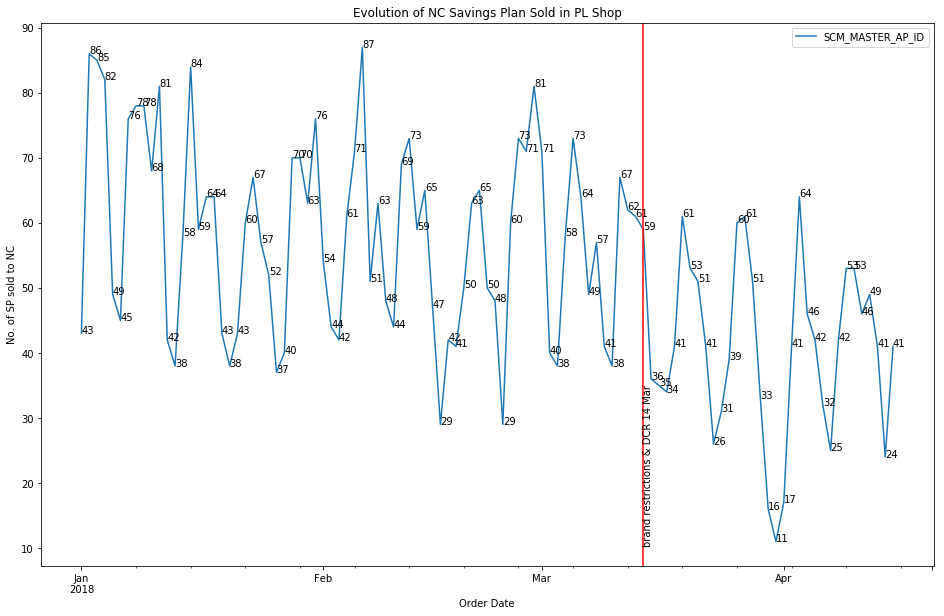

In [22]:
plt.figure(figsize=(16,10))
(sp_daily).plot()
plt.ylabel('No. of SP sold to NC')
plt.xlabel('Order Date')
plt.title('Evolution of NC Savings Plan Sold in PL Shop')
plt.legend()

plt.axvline(x='2018-03-14', color='red')
plt.text('2018-03-14', 34, 'brand restrictions & DCR 14 Mar', rotation=90)

ax = plt.gca()
for i, txt in enumerate(sp_daily):
    ax.annotate(txt, (sp_daily.index[i],sp_daily.values[i]))

In [23]:
sp_daily[sp_daily.index < '2018-03-14'].mean()

58.263888888888886

In [24]:
sp_daily[sp_daily.index >= '2018-03-14'].mean()

41.06060606060606

A two-sample t-test investigates whether the means of two independent data samples differ from one another. In a two-sample test, the null hypothesis is that the means of both groups are the same. 

In [25]:
import scipy.stats as stats
stats.ttest_ind(sp_daily[sp_daily.index < '2018-03-14'],
                sp_daily[sp_daily.index >= '2018-03-14'],
                equal_var=False) 

Ttest_indResult(statistic=5.800997107675369, pvalue=1.912212425823615e-07)

Due to p-value < 0.05 we can now reject the null hypothesis stating equality of mean in both groups and go for the alternative one (non equal).

In [26]:
lista4 = [float(str(i).replace(',','.')) for i in nc_pl['CZP_PRICE']]
nc_pl['CZP_PRICE'] = lista4

In [27]:
buy_sp_orders = nc_pl[nc_pl['SCM_MASTER_AP_ID'] == 42225]['SCM_N_ORDER_NR'].unique()

In [28]:
#Let`s quantify sales related to savings plan price
sp_sales_daily = nc_pl[nc_pl['SCM_MASTER_AP_ID'] == 42225].groupby('TDT_T_KEY_ORDER_DATE')['SCM_SALES_BMF'].sum()

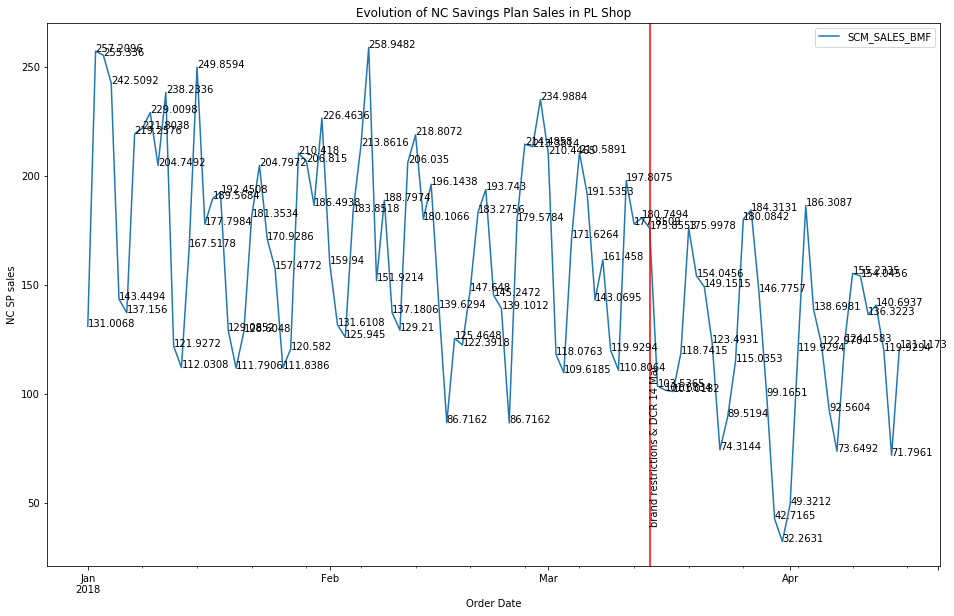

In [29]:
plt.figure(figsize=(16,10))
(sp_sales_daily).plot()
plt.ylabel('NC SP sales')
plt.xlabel('Order Date')
plt.title('Evolution of NC Savings Plan Sales in PL Shop')
plt.legend()

plt.axvline(x='2018-03-14', color='red')
plt.text('2018-03-14', 110, 'brand restrictions & DCR 14 Mar', rotation=90)

ax = plt.gca()
for i, txt in enumerate(sp_sales_daily):
    ax.annotate(txt, (sp_sales_daily.index[i],sp_sales_daily.values[i]))

In [30]:
sp_sales_daily[sp_sales_daily.index < '2018-03-14'].mean()

172.71960833333338

In [31]:
sp_sales_daily[sp_sales_daily.index >= '2018-03-14'].mean()

120.43767575757569

In [32]:
stats.ttest_ind(sp_sales_daily[sp_sales_daily.index < '2018-03-14'],
                sp_sales_daily[sp_sales_daily.index >= '2018-03-14'],
                equal_var=False) 

Ttest_indResult(statistic=5.936465437686111, pvalue=1.1205018640560735e-07)

Due to p-value < 0.05 we can now reject the null hypothesis stating equality of mean in both groups and go for the alternative one (non equal).

In [33]:
# And now absolute cm1 and cm2 (mean) per order per day 
sp_cm1_daily = nc_pl[nc_pl['SCM_N_ORDER_NR'].isin(buy_sp_orders)].groupby('TDT_T_KEY_ORDER_DATE')['SCM_D_FINANCE_CM1'].sum()/\
               nc_pl[nc_pl['SCM_N_ORDER_NR'].isin(buy_sp_orders)].groupby('TDT_T_KEY_ORDER_DATE')['SCM_N_ORDER_NR'].nunique()
sp_cm2_daily = nc_pl[nc_pl['SCM_N_ORDER_NR'].isin(buy_sp_orders)].groupby('TDT_T_KEY_ORDER_DATE')['SCM_D_FINANCE_CM2'].sum()/\
               nc_pl[nc_pl['SCM_N_ORDER_NR'].isin(buy_sp_orders)].groupby('TDT_T_KEY_ORDER_DATE')['SCM_N_ORDER_NR'].nunique()

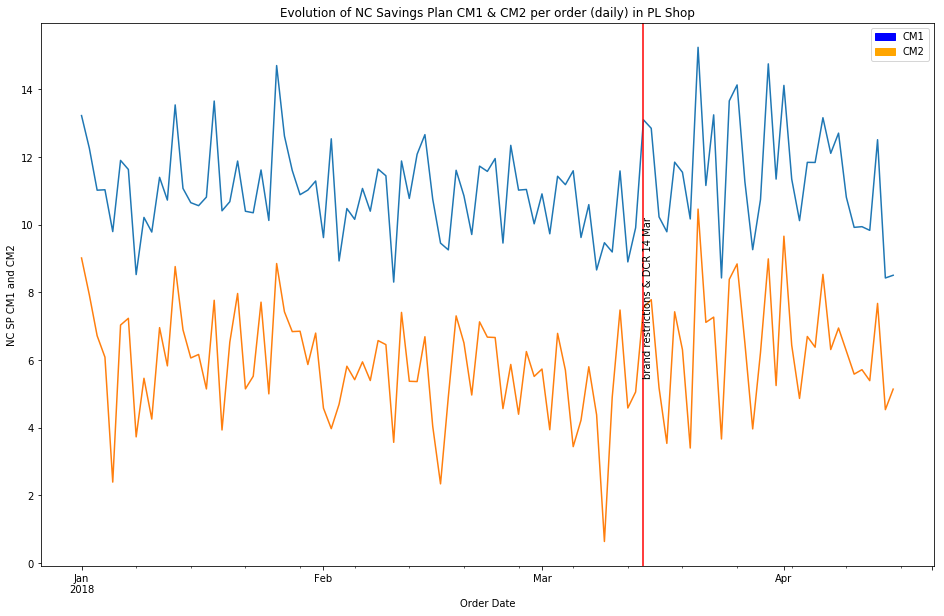

In [34]:
plt.figure(figsize=(16,10))
(sp_cm1_daily).plot()
(sp_cm2_daily).plot()
plt.ylabel('NC SP CM1 and CM2')
plt.xlabel('Order Date')
plt.title('Evolution of NC Savings Plan CM1 & CM2 per order (daily) in PL Shop')

blue_patch = mpatches.Patch(color='blue', label='CM1')
og_patch = mpatches.Patch(color='orange', label='CM2')
plt.legend(handles=[blue_patch, og_patch])

plt.axvline(x='2018-03-14', color='red')
plt.text('2018-03-14', 10, 'brand restrictions & DCR 14 Mar', rotation=90)

ax = plt.gca()

**Absolute CM1**

In [35]:
#Mean CM1 per order before 14 Mar
nc_pl[(nc_pl['SCM_N_ORDER_NR'].isin(buy_sp_orders)) & (nc_pl['TDT_T_KEY_ORDER_DATE'] < '2018-03-14')]['SCM_D_FINANCE_CM1'].sum()/\
nc_pl[(nc_pl['SCM_N_ORDER_NR'].isin(buy_sp_orders)) & (nc_pl['TDT_T_KEY_ORDER_DATE'] < '2018-03-14')]['SCM_N_ORDER_NR'].nunique()

10.910904481525625

In [36]:
#CM1 per order before 14 Mar
cm1_per_order_bef = nc_pl[(nc_pl['SCM_N_ORDER_NR'].isin(buy_sp_orders)) & (nc_pl['TDT_T_KEY_ORDER_DATE'] < '2018-03-14')]\
.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum()

In [37]:
#Mean CM1 per order from 14 Mar on
nc_pl[(nc_pl['SCM_N_ORDER_NR'].isin(buy_sp_orders)) & (nc_pl['TDT_T_KEY_ORDER_DATE'] >= '2018-03-14')]['SCM_D_FINANCE_CM1'].sum()/\
nc_pl[(nc_pl['SCM_N_ORDER_NR'].isin(buy_sp_orders)) & (nc_pl['TDT_T_KEY_ORDER_DATE'] >= '2018-03-14')]['SCM_N_ORDER_NR'].nunique()

11.445413210332104

In [38]:
#CM1 per order from 14 Mar on
cm1_per_order_aft = nc_pl[(nc_pl['SCM_N_ORDER_NR'].isin(buy_sp_orders)) & (nc_pl['TDT_T_KEY_ORDER_DATE'] >= '2018-03-14')]\
.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM1'].sum()

In [39]:
stats.ttest_ind(cm1_per_order_bef,
                cm1_per_order_aft,
                equal_var=False) 

Ttest_indResult(statistic=-1.4937459110872071, pvalue=0.13541136404303736)

There is no statistical evidence enough to reject the null hypothesis stating mean equality (p-value > 0.05)

**Absolute CM2**

In [40]:
#Daily mean CM2 per order before 14 Mar
nc_pl[(nc_pl['SCM_N_ORDER_NR'].isin(buy_sp_orders)) & (nc_pl['TDT_T_KEY_ORDER_DATE'] < '2018-03-14')]['SCM_D_FINANCE_CM2'].sum()/\
nc_pl[(nc_pl['SCM_N_ORDER_NR'].isin(buy_sp_orders)) & (nc_pl['TDT_T_KEY_ORDER_DATE'] < '2018-03-14')]['SCM_N_ORDER_NR'].nunique()

5.815818402860549

In [41]:
cm2_per_order_bef = nc_pl[(nc_pl['SCM_N_ORDER_NR'].isin(buy_sp_orders)) & (nc_pl['TDT_T_KEY_ORDER_DATE'] < '2018-03-14')]\
.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM2'].sum()

In [42]:
#Daily mean CM2 per order from 14 Mar on
nc_pl[(nc_pl['SCM_N_ORDER_NR'].isin(buy_sp_orders)) & (nc_pl['TDT_T_KEY_ORDER_DATE'] >= '2018-03-14')]['SCM_D_FINANCE_CM2'].sum()/\
nc_pl[(nc_pl['SCM_N_ORDER_NR'].isin(buy_sp_orders)) & (nc_pl['TDT_T_KEY_ORDER_DATE'] >= '2018-03-14')]['SCM_N_ORDER_NR'].nunique()

6.432459778597786

In [43]:
cm2_per_order_aft = nc_pl[(nc_pl['SCM_N_ORDER_NR'].isin(buy_sp_orders)) & (nc_pl['TDT_T_KEY_ORDER_DATE'] >= '2018-03-14')]\
.groupby('SCM_N_ORDER_NR')['SCM_D_FINANCE_CM2'].sum()

In [44]:
stats.ttest_ind(cm2_per_order_bef,
                cm2_per_order_aft,
                equal_var=False) 

Ttest_indResult(statistic=-1.691508871324077, pvalue=0.09090150980582958)

There is no statistical evidence enough to reject the null hypothesis stating mean equality (p-value > 0.05)

In [45]:
lista5 = [float(str(i).replace(',','.')) for i in nc_pl['OSP_NET_VALUE']]
nc_pl['OSP_NET_VALUE'] = lista5

In [46]:
nc_pl['REL_%_CM1'] = nc_pl['SCM_D_FINANCE_CM1'] / nc_pl['OSP_NET_VALUE'] * 100

In [47]:
nc_pl['REL_%_CM2'] = nc_pl['SCM_D_FINANCE_CM2'] / nc_pl['OSP_NET_VALUE'] * 100

In [48]:
#Relative % cm1 and cm2 (mean) per order per day 
rel_cm1_per_order = nc_pl[nc_pl['SCM_N_ORDER_NR'].isin(buy_sp_orders)]\
.groupby(['TDT_T_KEY_ORDER_DATE','SCM_N_ORDER_NR'],  as_index=False)['REL_%_CM1'].sum()

rel_cm1_per_order_by_day = rel_cm1_per_order.groupby('TDT_T_KEY_ORDER_DATE')['REL_%_CM1'].mean()

rel_cm2_per_order = nc_pl[nc_pl['SCM_N_ORDER_NR'].isin(buy_sp_orders)]\
.groupby(['TDT_T_KEY_ORDER_DATE','SCM_N_ORDER_NR'],  as_index=False)['REL_%_CM2'].sum()

rel_cm2_per_order_by_day = rel_cm2_per_order.groupby('TDT_T_KEY_ORDER_DATE')['REL_%_CM2'].mean()

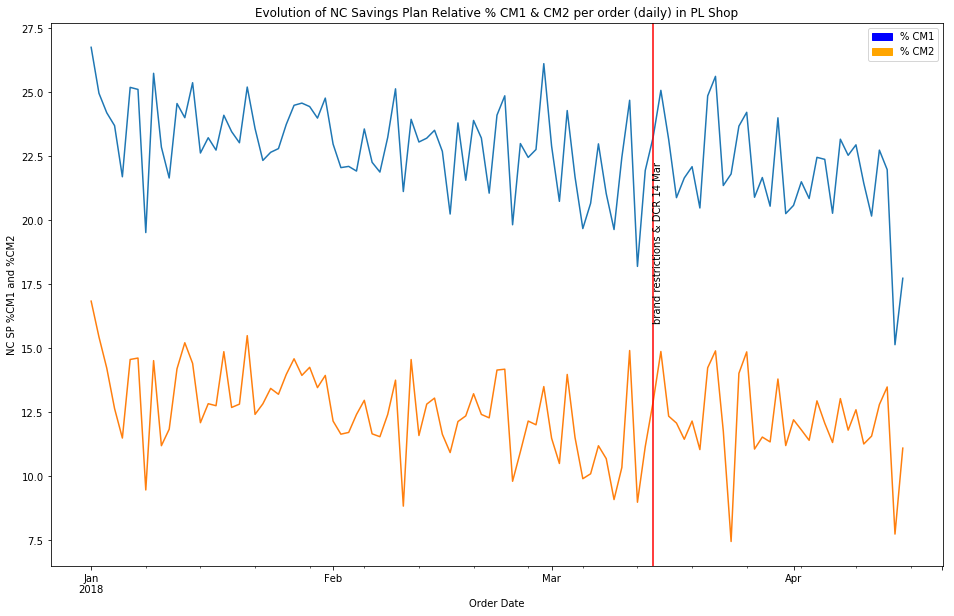

In [49]:
plt.figure(figsize=(16,10))
(rel_cm1_per_order_by_day).plot()
(rel_cm2_per_order_by_day).plot()
plt.ylabel('NC SP %CM1 and %CM2')
plt.xlabel('Order Date')
plt.title('Evolution of NC Savings Plan Relative % CM1 & CM2 per order (daily) in PL Shop')

blue_patch = mpatches.Patch(color='blue', label='% CM1')
og_patch = mpatches.Patch(color='orange', label='% CM2')
plt.legend(handles=[blue_patch, og_patch])

plt.axvline(x='2018-03-14', color='red')
plt.text('2018-03-14', 22, 'brand restrictions & DCR 14 Mar', rotation=90)

ax = plt.gca()

**Relative CM1**

In [50]:
#Mean relative CM1 % per order before 14 Mar
nc_pl[(nc_pl['SCM_N_ORDER_NR'].isin(buy_sp_orders)) & (nc_pl['TDT_T_KEY_ORDER_DATE'] < '2018-03-14')]\
.groupby('SCM_N_ORDER_NR')['REL_%_CM1'].sum().mean()

23.07335160263895

In [51]:
#Relative CM1 % per order before 14 Mar
rel_cm1_per_order_bef = nc_pl[(nc_pl['SCM_N_ORDER_NR'].isin(buy_sp_orders)) & (nc_pl['TDT_T_KEY_ORDER_DATE'] < '2018-03-14')]\
.groupby('SCM_N_ORDER_NR')['REL_%_CM1'].sum()

In [52]:
#Mean relative CM1 % per order from 14 Mar on
nc_pl[(nc_pl['SCM_N_ORDER_NR'].isin(buy_sp_orders)) & (nc_pl['TDT_T_KEY_ORDER_DATE'] >= '2018-03-14')]\
.groupby('SCM_N_ORDER_NR')['REL_%_CM1'].sum().mean()

21.997745403815106

In [53]:
#Relative CM1 % per order from 14 Mar on
rel_cm1_per_order_aft = nc_pl[(nc_pl['SCM_N_ORDER_NR'].isin(buy_sp_orders)) & (nc_pl['TDT_T_KEY_ORDER_DATE'] < '2018-03-14')]\
.groupby('SCM_N_ORDER_NR')['REL_%_CM1'].sum()

**Relative CM2**

In [54]:
nc_pl[(nc_pl['SCM_N_ORDER_NR'].isin(buy_sp_orders)) & (nc_pl['TDT_T_KEY_ORDER_DATE'] < '2018-03-14')]\
.groupby('SCM_N_ORDER_NR')['REL_%_CM2'].sum().mean()

12.632299525557878

In [55]:
rel_cm2_per_order_bef = nc_pl[(nc_pl['SCM_N_ORDER_NR'].isin(buy_sp_orders)) & (nc_pl['TDT_T_KEY_ORDER_DATE'] < '2018-03-14')]\
.groupby('SCM_N_ORDER_NR')['REL_%_CM2'].sum()

In [56]:
nc_pl[(nc_pl['SCM_N_ORDER_NR'].isin(buy_sp_orders)) & (nc_pl['TDT_T_KEY_ORDER_DATE'] >= '2018-03-14')]\
.groupby('SCM_N_ORDER_NR')['REL_%_CM2'].sum().mean()

12.218899232555653

In [57]:
rel_cm2_per_order_aft = nc_pl[(nc_pl['SCM_N_ORDER_NR'].isin(buy_sp_orders)) & (nc_pl['TDT_T_KEY_ORDER_DATE'] < '2018-03-14')]\
.groupby('SCM_N_ORDER_NR')['REL_%_CM2'].sum()

***SUMMARY***

| Date        | No. NC SP Sold per day| Sales NC SP Sold per day | CM1 per order (daily) | CM2 per order (daily)  | CM1% per order (daily) | CM2% per order (daily)  |
| ------------- |:-------------:| -----:|:-------------:| -----:||:-------------:| -----:|
| Before 14 Mar      | 58.26 | 172.72 | 10.91 | 5.82 | 23.07% | 12.63% |
| From 14 Mar on     | 41.06     |   120.44 | 11.45 | 6.43 | 22.00% | 12.22% |

...........................................................................................................................................................................................................................................

<html><head>


<!-- Load require.js. Delete this if your page already loads require.js -->
<script src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.3.4/require.min.js" integrity="sha256-Ae2Vz/4ePdIu6ZyI/5ZGsYnb+m0JlOmKPjt6XZ9JJkA=" crossorigin="anonymous"></script>
<script src="https://unpkg.com/@jupyter-widgets/html-manager@*/dist/embed-amd.js" crossorigin="anonymous"></script>
<script type="application/vnd.jupyter.widget-state+json">
{
    "version_major": 2,
    "version_minor": 0,
    "state": {}
}
</script>
</head>
<body>


</body>
</html>
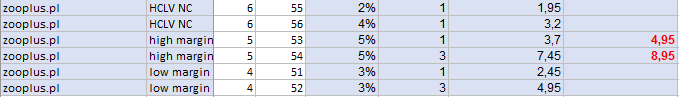

In [58]:
#Type & number of different Savings Plan bought
nc_pl[nc_pl['SCM_MASTER_AP_ID'] == 42225]['CZP_ZTQ_ID'].value_counts()

56.0    1236
55.0     128
53.0       1
Name: CZP_ZTQ_ID, dtype: int64

In [59]:
#Number of 1st and 2nd orders in our dataset
nc_pl.groupby('SCM_N_ORDER_NR')['OSP_KO_COUNT_NET'].mean().value_counts()

1    60891
2    44672
Name: OSP_KO_COUNT_NET, dtype: int64

In [60]:
#Let's list new lead PG4 restrictions for PL SHOP
pg4_excluded = [2304, 519, 283, 1308, 318, 47690, 282, 106999, 311, 175240, 167128, 13291, 31963, 42545, 81431, 314, 286, 
               242694, 751, 315, 285, 18154, 39875, 867, 865, 2125, 2078, 39209, 2083, 148538, 9616]

In [61]:
len(pg4_excluded)

31

In [62]:
#HCLV PG3 old
pg3_hclv_old = [857, 251, 2068, 252, 18, 301, 23, 29, 34, 38]

In [63]:
#HCLV PG3 new set up
pg3_hclv_new = [23, 38, 251, 252, 857, 2068]

In [64]:
#Split dataset using 14/03/2018 as inflection point...
bef = nc_pl[nc_pl['TDT_T_KEY_ORDER_DATE'] < '2018-03-14']
aft = nc_pl[nc_pl['TDT_T_KEY_ORDER_DATE'] >= '2018-03-14']

In [65]:
bef['SCM_N_ORDER_NR'].nunique(), aft['SCM_N_ORDER_NR'].nunique()

(76528, 29035)

**Conversion before 14 Mar Period**

Let's evaluate NC SP conversion in first orders (before 14 Mar) dividing total SP sold in first order (having HCLV PG3 old set up and AP_ID == 42225) by total 1st orders placed having the suitable HCLV PG3 (old set up):

In [66]:
#All eligible customers in 1st orders having HCLV PG3 (old set up)
all_elig_1st = bef[(bef['OSP_KO_COUNT_NET'] == 1) & (bef['OSP_3_LEAD_P_PG_ID'].isin(pg3_hclv_old))]['CUS_N_KEY_CUSTOMER'].unique()

In [67]:
#Those eligible in 1st order who also bought it
buy_in_1st = bef[(bef['OSP_KO_COUNT_NET'] == 1) & (bef['OSP_3_LEAD_P_PG_ID'].isin(pg3_hclv_old)) & (bef['SCM_MASTER_AP_ID'] == 42225)]\
['CUS_N_KEY_CUSTOMER'].unique()

In [68]:
len(buy_in_1st)

1707

In [69]:
len(all_elig_1st)

36312

% Conversion rate in 1st orders

In [70]:
float(len(buy_in_1st)) / len(all_elig_1st) * 100

4.7009253139458025

Let's go through 2nd orders conversion using set operations. Due to time window, we are going to use only data from customer having both, 1st and 2nd orders in the dataset.

In [71]:
#Total customers id in 1st orders
cus_1st = bef[bef['OSP_KO_COUNT_NET'] == 1]['CUS_N_KEY_CUSTOMER'].unique()

In [72]:
#Total 2nd orders
cus_2nd = bef[bef['OSP_KO_COUNT_NET'] == 2]['CUS_N_KEY_CUSTOMER'].unique()

In [73]:
cus_sample = [i for i in cus_1st if i in cus_2nd]

In [74]:
#1st orders in cus_sample
cus_1_st = bef[(bef['OSP_KO_COUNT_NET'] == 1) &
           bef['CUS_N_KEY_CUSTOMER'].isin(cus_sample)]['CUS_N_KEY_CUSTOMER'].unique()

In [75]:
#2nd orders in cus_sample
cus_2_nd = bef[(bef['OSP_KO_COUNT_NET'] == 2) &
           bef['CUS_N_KEY_CUSTOMER'].isin(cus_sample)]['CUS_N_KEY_CUSTOMER'].unique()

In [76]:
len(cus_sample), len(cus_1_st), len(cus_2_nd)

(11119, 11119, 11119)

In [77]:
#Eligible customer ids in 1st order
cus_elig_1st = bef[(bef['OSP_KO_COUNT_NET'] == 1) & (bef['OSP_3_LEAD_P_PG_ID'].isin(pg3_hclv_old)) &
                  (bef['CUS_N_KEY_CUSTOMER'].isin(cus_sample))]['CUS_N_KEY_CUSTOMER'].unique()

In [78]:
len(cus_elig_1st)

9350

In [79]:
#Non-eligible customer ids in 1st order
cus_not_elig_1st = [i for i in cus_1_st if i not in cus_elig_1st]

In [80]:
len(cus_not_elig_1st)

1769

In [81]:
len(cus_elig_1st) + len(cus_not_elig_1st) == len(cus_1_st)

True

In [82]:
#Customer ids elegible in 1st and buying SP in 1st
cus_buy_in_1st = bef[(bef['OSP_KO_COUNT_NET'] == 1) & (bef['OSP_3_LEAD_P_PG_ID'].isin(pg3_hclv_old)) &
                (bef['SCM_MASTER_AP_ID'] == 42225) & (bef['CUS_N_KEY_CUSTOMER'].isin(cus_sample))]\
                ['CUS_N_KEY_CUSTOMER'].unique()

In [83]:
len(cus_buy_in_1st)

575

% Conversion rate in 1st orders for our sample (higher...due to a more buying frequency?)

In [84]:
float(len(cus_buy_in_1st)) / len(cus_elig_1st) * 100

6.149732620320856

In [85]:
#Customer ids elegible in 1st but not buying SP 
cus_elig_1st_not_buy = [i for i in cus_elig_1st if i not in cus_buy_in_1st]

In [86]:
len(cus_elig_1st_not_buy)

8775

In [87]:
len(cus_buy_in_1st) + len(cus_elig_1st_not_buy) == len(cus_elig_1st)

True

In [88]:
#Customer ids with suitable 2nd orders to offer SP looking at lead PG3 (fake)
cus_elig_2nd = bef[(bef['OSP_KO_COUNT_NET'] == 2) & (bef['OSP_3_LEAD_P_PG_ID'].isin(pg3_hclv_old)) &
                  (bef['CUS_N_KEY_CUSTOMER'].isin(cus_sample))]['CUS_N_KEY_CUSTOMER'].unique()

In [89]:
len(cus_elig_2nd)

9567

In [90]:
#Customer ids with no suitable 2nd orders to offer SP looking at lead PG3 (fake)
cus_not_elig_2nd = [i for i in cus_2_nd if i not in cus_elig_2nd]

In [91]:
len(cus_not_elig_2nd)

1552

In [92]:
#Total SP bought in 2nd order
cus_buy_in_2nd = bef[(bef['OSP_KO_COUNT_NET'] == 2) & (bef['SCM_MASTER_AP_ID'] == 42225) &
                   (bef['CUS_N_KEY_CUSTOMER'].isin(cus_sample))]['CUS_N_KEY_CUSTOMER'].unique()

In [93]:
len(cus_buy_in_2nd)

1014

In [94]:
#Eligible in 1st order customer ids making a 2nd order but not buying 
cus_elig_1st_2nd = [i for i in cus_elig_1st_not_buy if i in cus_2_nd and i not in cus_buy_in_2nd]

In [95]:
len(cus_elig_1st_2nd)

7855

In [96]:
#Eligible in 1st order customer ids making a 2nd order where SP is bought 
cus_elig_1st_buy_2nd = [i for i in cus_elig_1st_not_buy if i in cus_buy_in_2nd]

In [97]:
len(cus_elig_1st_buy_2nd)

920

In [98]:
len(cus_elig_1st_2nd) + len(cus_elig_1st_buy_2nd) == len(cus_elig_1st_not_buy)

True

In [99]:
#Customers ids non eligible in 1st, eligible during 2nd and not buying SP
cus_not_elig_1st_2nd = [i for i in cus_not_elig_1st if i in cus_elig_2nd and i not in cus_buy_in_2nd]

In [100]:
len(cus_not_elig_1st_2nd)

990

In [101]:
#Customers ids non eligible in 1st, eligible during 2nd and buying SP
cus_not_elig_1st_buy_2nd = [i for i in cus_not_elig_1st if i in cus_buy_in_2nd]

In [102]:
len(cus_not_elig_1st_buy_2nd)

94

In [103]:
#eligible and non eligible customer ids in 1st order, eligible in 2nd and buying SP
len(cus_elig_1st_buy_2nd) + len(cus_not_elig_1st_buy_2nd)

1014

In [104]:
#Total eligible customer ids in 2nd order
len(cus_elig_1st_2nd) + len(cus_elig_1st_buy_2nd) + len(cus_not_elig_1st_2nd) + len(cus_not_elig_1st_buy_2nd)

9859

% Conversion rate in 2nd order

In [105]:
float(len(cus_elig_1st_buy_2nd) + len(cus_not_elig_1st_buy_2nd))/\
(len(cus_elig_1st_2nd) + len(cus_elig_1st_buy_2nd) + len(cus_not_elig_1st_2nd) + len(cus_not_elig_1st_buy_2nd)) * 100

10.285018764580586

**Conversion from 14 Mar Period**

In [106]:
#Number of 1st and 2nd orders from 14 Mar on
aft_1st = aft.groupby('SCM_N_ORDER_NR')['OSP_KO_COUNT_NET'].mean()[aft.groupby('SCM_N_ORDER_NR')['OSP_KO_COUNT_NET'].mean() == 1].index.values
aft_2nd = aft.groupby('SCM_N_ORDER_NR')['OSP_KO_COUNT_NET'].mean()[aft.groupby('SCM_N_ORDER_NR')['OSP_KO_COUNT_NET'].mean() == 2].index.values

In [107]:
#All eligible customers in 1st orders having HCLV PG3 (new set up) and not having excluding PG4
all_elig_1st_a = aft[(aft['OSP_KO_COUNT_NET'] == 1) & (aft['OSP_3_LEAD_P_PG_ID'].isin(pg3_hclv_new))
                    & (~aft['OSP_4_LEAD_P_PG_ID'].isin(pg4_excluded))]['CUS_N_KEY_CUSTOMER'].unique()

In [108]:
#Those eligible in 1st order who also bought it
buy_in_1st_a = aft[(aft['OSP_KO_COUNT_NET'] == 1) & (aft['OSP_3_LEAD_P_PG_ID'].isin(pg3_hclv_new)) &
                   (~aft['OSP_4_LEAD_P_PG_ID'].isin(pg4_excluded)) & (aft['SCM_MASTER_AP_ID'] == 42225)]\
                    ['CUS_N_KEY_CUSTOMER'].unique()

In [109]:
len(buy_in_1st_a)

685

In [110]:
len(all_elig_1st_a)

9529

% Conversion rate in 1st orders

In [111]:
float(len(buy_in_1st_a)) / len(all_elig_1st_a) * 100

7.188582222688635

Let's go through 2nd orders conversion using set operations. Due to time window, we are going to use only data from customer having both, 1st and 2nd orders in the dataset.

In [112]:
#Total customers id in 1st orders
cus_1st_a = aft[aft['OSP_KO_COUNT_NET'] == 1]['CUS_N_KEY_CUSTOMER'].unique()

In [113]:
#Total 2nd orders
cus_2nd_a = aft[aft['OSP_KO_COUNT_NET'] == 2]['CUS_N_KEY_CUSTOMER'].unique()

In [114]:
cus_sample_a = [i for i in cus_1st_a if i in cus_2nd_a]

In [115]:
cus_1_st_a = aft[(aft['OSP_KO_COUNT_NET'] == 1) &
           aft['CUS_N_KEY_CUSTOMER'].isin(cus_sample_a)]['CUS_N_KEY_CUSTOMER'].unique()

In [116]:
cus_2_nd_a = aft[(aft['OSP_KO_COUNT_NET'] == 2) &
           aft['CUS_N_KEY_CUSTOMER'].isin(cus_sample_a)]['CUS_N_KEY_CUSTOMER'].unique()

In [117]:
len(cus_sample_a), len(cus_1_st_a), len(cus_2_nd_a)

(1621, 1621, 1621)

In [118]:
#Eligible customer ids in 1st order
cus_elig_1st_a = aft[(aft['OSP_KO_COUNT_NET'] == 1) & (aft['OSP_3_LEAD_P_PG_ID'].isin(pg3_hclv_new)) &
                (~aft['OSP_4_LEAD_P_PG_ID'].isin(pg4_excluded)) & (aft['CUS_N_KEY_CUSTOMER'].isin(cus_sample_a))]\
                ['CUS_N_KEY_CUSTOMER'].unique()

In [119]:
len(cus_elig_1st_a)

953

In [120]:
#Non-eligible customer ids in 1st order
cus_not_elig_1st_a = [i for i in cus_1_st_a if i not in cus_elig_1st_a]

In [121]:
len(cus_not_elig_1st_a)

668

In [122]:
len(cus_elig_1st_a) + len(cus_not_elig_1st_a) == len(cus_1_st_a)

True

In [123]:
#Customer ids elegible in 1st and buying SP in 1st
cus_buy_in_1st_a = aft[(aft['OSP_KO_COUNT_NET'] == 1) & (aft['OSP_3_LEAD_P_PG_ID'].isin(pg3_hclv_new)) &
                    (~aft['OSP_4_LEAD_P_PG_ID'].isin(pg4_excluded)) &
                    (aft['SCM_MASTER_AP_ID'] == 42225) & (aft['CUS_N_KEY_CUSTOMER'].isin(cus_sample_a))]\
                    ['CUS_N_KEY_CUSTOMER'].unique()

In [124]:
len(cus_buy_in_1st_a)

109

% Conversion rate in 1st orders for our sample (higher...due to a more buying frequency?)

In [125]:
float(len(cus_buy_in_1st_a)) / len(cus_elig_1st_a) * 100

11.437565582371459

In [126]:
#Customer ids elegible in 1st but not buying SP 
cus_elig_1st_not_buy_a = [i for i in cus_elig_1st_a if i not in cus_buy_in_1st_a]

In [127]:
len(cus_elig_1st_not_buy_a)

844

In [128]:
len(cus_buy_in_1st_a) + len(cus_elig_1st_not_buy_a) == len(cus_elig_1st_a)

True

In [129]:
#Customer ids with suitable 2nd orders to offer SP looking at lead PG3 (fake)
cus_elig_2nd_a = aft[(aft['OSP_KO_COUNT_NET'] == 2) & (aft['OSP_3_LEAD_P_PG_ID'].isin(pg3_hclv_new)) &
                   (~aft['OSP_4_LEAD_P_PG_ID'].isin(pg4_excluded)) &
                  (aft['CUS_N_KEY_CUSTOMER'].isin(cus_sample_a))]['CUS_N_KEY_CUSTOMER'].unique()

In [130]:
len(cus_elig_2nd_a)

934

In [131]:
#Customer ids with no suitable 2nd orders to offer SP looking at lead PG3 (fake)
cus_not_elig_2nd_a = [i for i in cus_2_nd_a if i not in cus_elig_2nd_a]

In [132]:
len(cus_not_elig_2nd_a)

687

In [133]:
#Total SP bought in 2nd order
cus_buy_in_2nd_a = aft[(aft['OSP_KO_COUNT_NET'] == 2) & (aft['SCM_MASTER_AP_ID'] == 42225) &
                   (aft['CUS_N_KEY_CUSTOMER'].isin(cus_sample_a))]['CUS_N_KEY_CUSTOMER'].unique()

In [134]:
len(cus_buy_in_2nd_a)

83

In [135]:
#Eligible in 1st order (not buying) customer ids making a 2nd order but not buying 
cus_elig_1st_2nd_a = [i for i in cus_elig_1st_not_buy_a if i in cus_2_nd_a and i not in cus_buy_in_2nd_a]

In [136]:
len(cus_elig_1st_2nd_a)

800

In [137]:
#Eligible in 1st order customer ids making a 2nd order where SP is bought 
cus_elig_1st_buy_2nd_a = [i for i in cus_elig_1st_not_buy_a if i in cus_buy_in_2nd_a]

In [138]:
len(cus_elig_1st_buy_2nd_a)

44

In [139]:
len(cus_elig_1st_2nd_a) + len(cus_elig_1st_buy_2nd_a) == len(cus_elig_1st_not_buy_a)

True

In [140]:
#Customer ids non-eligible in 1st, eligible during 2nd and not buying
cus_not_elig_1st_2nd_a = [i for i in cus_not_elig_1st_a if i in cus_elig_2nd_a and i not in cus_buy_in_2nd_a]

In [141]:
len(cus_not_elig_1st_2nd_a)

248

In [142]:
#Customer ids non-eligible in 1st, eligible during 2nd and buying SP
cus_not_elig_1st_buy_2nd_a = [i for i in cus_not_elig_1st_a if i in cus_buy_in_2nd_a]

In [143]:
len(cus_not_elig_1st_buy_2nd_a)

39

In [144]:
#eligible and non-eligible customer ids in 1st order, eligible in 2nd and buying SP
len(cus_elig_1st_buy_2nd_a) + len(cus_not_elig_1st_buy_2nd_a)

83

In [145]:
#Total eligible customer ids in 2nd order
len(cus_elig_1st_2nd_a) + len(cus_elig_1st_buy_2nd_a) + len(cus_not_elig_1st_2nd_a) + len(cus_not_elig_1st_buy_2nd_a)

1131

% Conversion rate in 2nd order

In [146]:
float(len(cus_elig_1st_buy_2nd_a) + len(cus_not_elig_1st_buy_2nd_a))/\
(len(cus_elig_1st_2nd_a) + len(cus_elig_1st_buy_2nd_a) + len(cus_not_elig_1st_2nd_a) + len(cus_not_elig_1st_buy_2nd_a)) * 100

7.338638373121132

..............................................................................................................................................................................................................................................................

| Date        | 1st order conversion %           | (sample) 2nd order conversion % |
| ------------- |:-------------:| -----:|
| Before 14 Mar      | 4.70 | 10.29 |
| From 14 Mar on     | 7.19    | 7.34 |


2nd order conversion is a bit tricky, we have for first period a 3 month time window (time enough for replenishment and repurchase) instead of a 1 month time window for the period after the changes. For calculations, we have selected in each time window only customers having placed 1st and 2nd order.

DCR?

<html><head>


<!-- Load require.js. Delete this if your page already loads require.js -->
<script src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.3.4/require.min.js" integrity="sha256-Ae2Vz/4ePdIu6ZyI/5ZGsYnb+m0JlOmKPjt6XZ9JJkA=" crossorigin="anonymous"></script>
<script src="https://unpkg.com/@jupyter-widgets/html-manager@*/dist/embed-amd.js" crossorigin="anonymous"></script>
<script type="application/vnd.jupyter.widget-state+json">
{
    "version_major": 2,
    "version_minor": 0,
    "state": {}
}
</script>
</head>
<body>


</body>
</html>


In [147]:
nc_pl[nc_pl['TDT_T_KEY_ORDER_DATE'] >= ' 2018-03-14']['SCM_OCI_LAND'].unique()

array(['PL'], dtype=object)

In [148]:
allowed_c = ['PL']

In [149]:
dcr = nc_pl[(nc_pl['TDT_T_KEY_ORDER_DATE'] >= ' 2018-03-14') & (~nc_pl['SCM_OCI_LAND'].isin(allowed_c))]

In [150]:
len(dcr['SCM_N_ORDER_NR'].unique())

0

In [151]:
#No SP sold
(dcr['SCM_MASTER_AP_ID'] == 42225).sum()

0

In [152]:
#No SP discount applying neither
(dcr['SCM_MASTER_AP_ID'] == 42715).sum()

0

In [153]:
#Criteria
len(dcr[(dcr['OSP_3_LEAD_P_PG_ID'].isin(pg3_hclv_new)) & (~dcr['OSP_4_LEAD_P_PG_ID'].isin(pg4_excluded))]['SCM_N_ORDER_NR'].unique())

0